In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ny_demographics.csv')
df = df.copy()
print(df.shape)
df.head()

(744, 96)


,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,50,36,1,New York,Albany County,1,304204,147076,157128,15286,...,4531,6858,2604,4254,7100,2104,4996,38.5,36.8,40.0
1,50,36,1,New York,Albany County,2,304208,147076,157132,15288,...,4532,6858,2605,4253,7100,2104,4996,38.5,36.8,40.0
2,50,36,1,New York,Albany County,3,304086,147026,157060,15275,...,4516,6851,2620,4231,7162,2128,5034,38.5,36.8,40.0
3,50,36,1,New York,Albany County,4,304596,147456,157140,15161,...,4456,6770,2633,4137,7238,2179,5059,38.4,36.6,40.1
4,50,36,1,New York,Albany County,5,305723,147934,157789,15233,...,4296,6580,2545,4035,7410,2280,5130,38.1,36.4,39.8


In [3]:
# map acutal year to year value 
# note: based on https://www.census.gov/quickfacts/nassaucountynewyork
# and given that there are numerical years 1 through 12 with data from 2010 to 2019
# it seems as if years 1 and 2 are both 2010

# dropping year 1
df = df[df['YEAR'] != 1]
df['YEAR'] = df['YEAR'].replace([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                [2010, 2011, 2012, 2013, 2014, 2015,
                                 2016, 2017, 2018, 2019, 2020])

In [4]:
# get just nassau and suffolk counties
long_island = df[(df['CTYNAME'] == 'Nassau County') | (df['CTYNAME'] == 'Suffolk County')]
long_island

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
349,50,36,59,New York,Nassau County,2010,1339880,648142,691738,73899,...,22161,34391,13405,20986,34072,11620,22452,41.2,39.5,42.7
350,50,36,59,New York,Nassau County,2011,1341669,649155,692514,74132,...,22013,34320,13392,20928,34441,11759,22682,41.2,39.5,42.7
351,50,36,59,New York,Nassau County,2012,1346223,651868,694355,73994,...,21652,33722,13160,20562,35474,12203,23271,41.3,39.6,42.9
352,50,36,59,New York,Nassau County,2013,1349616,654133,695483,73896,...,21371,33003,12974,20029,36422,12508,23914,41.5,39.6,43.1
353,50,36,59,New York,Nassau County,2014,1352193,655740,696453,73638,...,21338,31962,12601,19361,37109,12735,24374,41.6,39.7,43.2
354,50,36,59,New York,Nassau County,2015,1354705,657419,697286,74361,...,21330,30946,12211,18735,37889,13077,24812,41.6,39.7,43.3
355,50,36,59,New York,Nassau County,2016,1354840,657830,697010,74449,...,21276,30097,11869,18228,38417,13332,25085,41.7,39.8,43.4
356,50,36,59,New York,Nassau County,2017,1355952,659073,696879,74173,...,21266,29794,11775,18019,38776,13474,25302,41.7,39.9,43.4
357,50,36,59,New York,Nassau County,2018,1357293,660672,696621,74238,...,21911,29553,11798,17755,38717,13407,25310,41.7,39.9,43.4
358,50,36,59,New York,Nassau County,2019,1357534,661241,696293,74390,...,22928,29709,11930,17779,38525,13396,25129,41.7,40.0,43.4


In [5]:
# nassau county
nassau = long_island[(long_island['CTYNAME'] == 'Nassau County')]
nassau.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
349,50,36,59,New York,Nassau County,2010,1339880,648142,691738,73899,...,22161,34391,13405,20986,34072,11620,22452,41.2,39.5,42.7
350,50,36,59,New York,Nassau County,2011,1341669,649155,692514,74132,...,22013,34320,13392,20928,34441,11759,22682,41.2,39.5,42.7
351,50,36,59,New York,Nassau County,2012,1346223,651868,694355,73994,...,21652,33722,13160,20562,35474,12203,23271,41.3,39.6,42.9
352,50,36,59,New York,Nassau County,2013,1349616,654133,695483,73896,...,21371,33003,12974,20029,36422,12508,23914,41.5,39.6,43.1
353,50,36,59,New York,Nassau County,2014,1352193,655740,696453,73638,...,21338,31962,12601,19361,37109,12735,24374,41.6,39.7,43.2


In [6]:
# suffolk county
suffolk = long_island[(long_island['CTYNAME'] == 'Suffolk County')]
suffolk.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
613,50,36,103,New York,Suffolk County,2010,1493116,734557,758559,85968,...,20838,29171,11792,17379,27825,8812,19013,39.8,38.4,41.1
614,50,36,103,New York,Suffolk County,2011,1494339,735226,759113,85991,...,20783,29292,11868,17424,28116,8942,19174,39.9,38.4,41.1
615,50,36,103,New York,Suffolk County,2012,1498892,737743,761149,84694,...,20793,29558,12103,17455,28959,9316,19643,40.2,38.7,41.5
616,50,36,103,New York,Suffolk County,2013,1496982,737045,759937,83333,...,20868,29734,12271,17463,30119,9838,20281,40.6,39.0,41.9
617,50,36,103,New York,Suffolk County,2014,1497346,737417,759929,82075,...,21114,29720,12217,17503,31005,10333,20672,40.8,39.2,42.3


In [7]:
# get column names
long_island.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'POPESTIMATE',
       'POPEST_MALE', 'POPEST_FEM', 'UNDER5_TOT', 'UNDER5_MALE', 'UNDER5_FEM',
       'AGE513_TOT', 'AGE513_MALE', 'AGE513_FEM', 'AGE1417_TOT',
       'AGE1417_MALE', 'AGE1417_FEM', 'AGE1824_TOT', 'AGE1824_MALE',
       'AGE1824_FEM', 'AGE16PLUS_TOT', 'AGE16PLUS_MALE', 'AGE16PLUS_FEM',
       'AGE18PLUS_TOT', 'AGE18PLUS_MALE', 'AGE18PLUS_FEM', 'AGE1544_TOT',
       'AGE1544_MALE', 'AGE1544_FEM', 'AGE2544_TOT', 'AGE2544_MALE',
       'AGE2544_FEM', 'AGE4564_TOT', 'AGE4564_MALE', 'AGE4564_FEM',
       'AGE65PLUS_TOT', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM', 'AGE04_TOT',
       'AGE04_MALE', 'AGE04_FEM', 'AGE59_TOT', 'AGE59_MALE', 'AGE59_FEM',
       'AGE1014_TOT', 'AGE1014_MALE', 'AGE1014_FEM', 'AGE1519_TOT',
       'AGE1519_MALE', 'AGE1519_FEM', 'AGE2024_TOT', 'AGE2024_MALE',
       'AGE2024_FEM', 'AGE2529_TOT', 'AGE2529_MALE', 'AGE2529_FEM',
       'AGE3034_TOT', 'AGE3034_MALE', 'AGE3034_FEM', 'AGE3539_TOT',
   

In [8]:
# TODO - look at population cohort trends from 2010 to 2020
# male, female and total by county
# add in deaths
# estimate number of people leaving
# estimate future deaths / death rate

In [9]:
# separating nassau male
nassau_male = nassau[['YEAR', 'AGE04_MALE', 'AGE59_MALE',
                      'AGE1014_MALE', 'AGE1519_MALE', 'AGE2024_MALE',
                      'AGE2529_MALE', 'AGE3034_MALE', 'AGE3539_MALE', 
                      'AGE4044_MALE', 'AGE4549_MALE', 'AGE5054_MALE',
                      'AGE5559_MALE', 'AGE6064_MALE', 'AGE6569_MALE',
                      'AGE7074_MALE', 'AGE7579_MALE', 'AGE8084_MALE',
                      'AGE85PLUS_MALE']]
nassau_male = nassau_male.set_index('YEAR')
nassau_male.head(11)

,AGE04_MALE,AGE59_MALE,AGE1014_MALE,AGE1519_MALE,AGE2024_MALE,AGE2529_MALE,AGE3034_MALE,AGE3539_MALE,AGE4044_MALE,AGE4549_MALE,AGE5054_MALE,AGE5559_MALE,AGE6064_MALE,AGE6569_MALE,AGE7074_MALE,AGE7579_MALE,AGE8084_MALE,AGE85PLUS_MALE
YEAR,,,,,,,,,,,,,,,,,,
2010,37724,42776,47984,48729,41117,36407,35124,38857,46360,52661,52212,45131,37904,25623,18719,15789,13405,11620
2011,37843,42685,47802,48874,41202,36774,35324,38688,46126,52467,52319,45333,38235,25892,18770,15670,13392,11759
2012,37792,42328,46986,49300,41739,37730,35830,37809,45252,51377,52809,46081,39996,27018,19035,15423,13160,12203
2013,37876,42023,46135,49361,42082,38570,36386,37493,44196,50308,52576,47203,39766,29659,19638,15379,12974,12508
2014,37514,41719,45669,48391,43039,39439,36919,37777,43106,48873,52345,48066,40091,31147,20830,15479,12601,12735
2015,38001,41121,45123,47436,44075,39752,37511,38075,41979,47365,52202,48845,40747,32690,21694,15515,12211,13077
2016,38084,40798,44460,46452,44360,40218,37451,38574,40887,46421,51298,49774,41555,34027,22491,15779,11869,13332
2017,38011,40883,43956,45762,44376,40578,38041,39082,39973,45757,50155,50073,42258,35496,23468,15955,11775,13474
2018,38040,41116,43634,44934,44514,40696,38559,39587,39855,44789,49119,49881,43328,35232,25646,16537,11798,13407


In [10]:
# separating nassau female
nassau_female = nassau[['YEAR', 'AGE04_FEM', 'AGE59_FEM',
                        'AGE1014_FEM', 'AGE1519_FEM', 'AGE2024_FEM',
                        'AGE2529_FEM', 'AGE3034_FEM', 'AGE3539_FEM', 
                        'AGE4044_FEM', 'AGE4549_FEM', 'AGE5054_FEM',
                        'AGE5559_FEM', 'AGE6064_FEM', 'AGE6569_FEM',
                        'AGE7074_FEM', 'AGE7579_FEM', 'AGE8084_FEM',
                        'AGE85PLUS_FEM']]
nassau_female = nassau_female.set_index('YEAR')
nassau_female.head(11)

,AGE04_FEM,AGE59_FEM,AGE1014_FEM,AGE1519_FEM,AGE2024_FEM,AGE2529_FEM,AGE3034_FEM,AGE3539_FEM,AGE4044_FEM,AGE4549_FEM,AGE5054_FEM,AGE5559_FEM,AGE6064_FEM,AGE6569_FEM,AGE7074_FEM,AGE7579_FEM,AGE8084_FEM,AGE85PLUS_FEM
YEAR,,,,,,,,,,,,,,,,,,
2010,36175,40642,45655,45369,38281,34851,36206,41746,50717,57297,55870,48302,41038,29974,24016,22161,20986,22452
2011,36289,40527,45479,45625,38454,35133,36313,41408,50422,57103,56045,48513,41411,30199,23970,22013,20928,22682
2012,36202,40085,44709,46262,39215,35857,36774,40006,49380,55938,56658,49337,43262,31148,24037,21652,20562,23271
2013,36020,39902,43871,46228,39771,36787,37112,39460,47725,54825,56456,50712,42995,33654,24651,21371,20029,23914
2014,36124,39711,43116,45654,40877,37534,37502,39276,46164,53156,56208,51853,43564,34697,25944,21338,19361,24374
2015,36360,39157,42719,44915,41978,37950,37847,39526,44545,51461,56062,52629,44284,36215,26761,21330,18735,24812
2016,36365,39062,41912,44121,42550,38403,37708,39946,43017,50264,55165,53346,45245,37768,27549,21276,18228,25085
2017,36162,39068,41556,43372,42890,38649,38052,40263,41823,49113,54032,53783,45883,39415,28231,21266,18019,25302
2018,36198,38918,41491,42566,42788,38955,38487,40646,41355,47557,52839,53476,46920,39190,30259,21911,17755,25310


In [11]:
# nassau total
nassau_total = nassau[['YEAR', 'AGE04_TOT', 'AGE59_TOT',
                       'AGE1014_TOT', 'AGE1519_TOT', 'AGE2024_TOT',
                       'AGE2529_TOT', 'AGE3034_TOT', 'AGE3539_TOT', 
                       'AGE4044_TOT', 'AGE4549_TOT', 'AGE5054_TOT',
                       'AGE5559_TOT', 'AGE6064_TOT', 'AGE6569_TOT',
                       'AGE7074_TOT', 'AGE7579_TOT', 'AGE8084_TOT',
                       'AGE85PLUS_TOT']]
nassau_total = nassau_total.set_index('YEAR')
nassau_total.head(11)

,AGE04_TOT,AGE59_TOT,AGE1014_TOT,AGE1519_TOT,AGE2024_TOT,AGE2529_TOT,AGE3034_TOT,AGE3539_TOT,AGE4044_TOT,AGE4549_TOT,AGE5054_TOT,AGE5559_TOT,AGE6064_TOT,AGE6569_TOT,AGE7074_TOT,AGE7579_TOT,AGE8084_TOT,AGE85PLUS_TOT
YEAR,,,,,,,,,,,,,,,,,,
2010,73899,83418,93639,94098,79398,71258,71330,80603,97077,109958,108082,93433,78942,55597,42735,37950,34391,34072
2011,74132,83212,93281,94499,79656,71907,71637,80096,96548,109570,108364,93846,79646,56091,42740,37683,34320,34441
2012,73994,82413,91695,95562,80954,73587,72604,77815,94632,107315,109467,95418,83258,58166,43072,37075,33722,35474
2013,73896,81925,90006,95589,81853,75357,73498,76953,91921,105133,109032,97915,82761,63313,44289,36750,33003,36422
2014,73638,81430,88785,94045,83916,76973,74421,77053,89270,102029,108553,99919,83655,65844,46774,36817,31962,37109
2015,74361,80278,87842,92351,86053,77702,75358,77601,86524,98826,108264,101474,85031,68905,48455,36845,30946,37889
2016,74449,79860,86372,90573,86910,78621,75159,78520,83904,96685,106463,103120,86800,71795,50040,37055,30097,38417
2017,74173,79951,85512,89134,87266,79227,76093,79345,81796,94870,104187,103856,88141,74911,51699,37221,29794,38776
2018,74238,80034,85125,87500,87302,79651,77046,80233,81210,92346,101958,103357,90248,74422,55905,38448,29553,38717


In [12]:
# separating suffolk male
suffolk_male = suffolk[['YEAR', 'AGE04_MALE', 'AGE59_MALE',
                        'AGE1014_MALE', 'AGE1519_MALE', 'AGE2024_MALE',
                        'AGE2529_MALE', 'AGE3034_MALE', 'AGE3539_MALE', 
                        'AGE4044_MALE', 'AGE4549_MALE', 'AGE5054_MALE',
                        'AGE5559_MALE', 'AGE6064_MALE', 'AGE6569_MALE',
                        'AGE7074_MALE', 'AGE7579_MALE', 'AGE8084_MALE',
                        'AGE85PLUS_MALE']]
suffolk_male = suffolk_male.set_index('YEAR')
suffolk_male.head(11)

,AGE04_MALE,AGE59_MALE,AGE1014_MALE,AGE1519_MALE,AGE2024_MALE,AGE2529_MALE,AGE3034_MALE,AGE3539_MALE,AGE4044_MALE,AGE4549_MALE,AGE5054_MALE,AGE5559_MALE,AGE6064_MALE,AGE6569_MALE,AGE7074_MALE,AGE7579_MALE,AGE8084_MALE,AGE85PLUS_MALE
YEAR,,,,,,,,,,,,,,,,,,
2010,44072,50130,54507,55944,47324,41992,42488,47247,57567,63418,58180,46467,39344,28895,20428,15950,11792,8812
2011,44062,49887,54265,55884,47662,42223,42527,46852,57121,63275,58573,46886,39658,29083,20568,15890,11868,8942
2012,43428,49299,53544,55734,48968,42823,42510,45214,55644,62246,60263,48559,41160,29892,21173,15867,12103,9316
2013,42484,48388,52591,54988,49588,43306,42340,44136,53645,60909,60991,50285,40712,32432,22157,15984,12271,9838
2014,41999,47263,51616,54084,50764,44153,42192,43842,51528,59394,61371,52266,41117,33344,23578,16356,12217,10333
2015,41598,45619,51048,53167,51291,45138,42096,43404,49336,57395,61725,54039,41915,34570,24537,16778,12145,10756
2016,41109,44721,49918,52265,50766,46014,41823,43097,47073,55940,61288,55581,43387,35664,25409,17032,12134,11194
2017,40559,43620,49018,51358,50218,46578,41680,43202,45167,54290,60072,56907,44724,36824,25958,17647,12107,11633
2018,40239,42889,48100,50638,49890,47197,42049,43172,44242,52353,58728,57636,46150,36366,28042,18450,12169,11943


In [13]:
# separating suffolk female
suffolk_female = suffolk[['YEAR', 'AGE04_FEM', 'AGE59_FEM',
                          'AGE1014_FEM', 'AGE1519_FEM', 'AGE2024_FEM',
                          'AGE2529_FEM', 'AGE3034_FEM', 'AGE3539_FEM', 
                          'AGE4044_FEM', 'AGE4549_FEM', 'AGE5054_FEM',
                          'AGE5559_FEM', 'AGE6064_FEM', 'AGE6569_FEM',
                          'AGE7074_FEM', 'AGE7579_FEM', 'AGE8084_FEM',
                          'AGE85PLUS_FEM']]
suffolk_female = suffolk_female.set_index('YEAR')
suffolk_female.head(11)

,AGE04_FEM,AGE59_FEM,AGE1014_FEM,AGE1519_FEM,AGE2024_FEM,AGE2529_FEM,AGE3034_FEM,AGE3539_FEM,AGE4044_FEM,AGE4549_FEM,AGE5054_FEM,AGE5559_FEM,AGE6064_FEM,AGE6569_FEM,AGE7074_FEM,AGE7579_FEM,AGE8084_FEM,AGE85PLUS_FEM
YEAR,,,,,,,,,,,,,,,,,,
2010,41896,47677,51835,51030,43030,39669,42512,49191,59308,65013,59127,48463,43928,33750,24900,20838,17379,19013
2011,41929,47397,51659,51102,43399,39790,42487,48613,58942,64907,59529,48820,44138,33982,25038,20783,17424,19174
2012,41266,46511,51236,51260,44953,40051,42227,46264,57813,64089,61286,50388,45274,34898,25742,20793,17455,19643
2013,40849,45349,50314,50962,45706,40226,41453,44879,55700,63095,61968,52199,44023,37647,26955,20868,17463,20281
2014,40076,44480,49541,50243,46990,40800,41019,44232,53388,61632,62743,53909,44350,38493,28744,21114,17503,20672
2015,40047,43342,48750,49481,47923,41369,40748,43543,50927,59655,63316,55353,45065,39465,29897,21629,17367,21091
2016,40015,42188,47680,48964,48123,42267,40287,43203,48580,57763,62952,57181,45935,40555,30893,22174,17157,21635
2017,39507,41599,46460,48325,48010,42794,40038,42922,46038,56459,61782,58505,47276,41428,31547,22831,17177,22146
2018,39002,41221,45371,47699,48032,43299,40388,42432,44678,54532,60747,59155,48773,40417,33799,23737,17326,22497


In [14]:
# suffolk total
suffolk_total = suffolk[['YEAR', 'AGE04_TOT', 'AGE59_TOT',
                         'AGE1014_TOT', 'AGE1519_TOT', 'AGE2024_TOT',
                         'AGE2529_TOT', 'AGE3034_TOT', 'AGE3539_TOT', 
                         'AGE4044_TOT', 'AGE4549_TOT', 'AGE5054_TOT',
                         'AGE5559_TOT', 'AGE6064_TOT', 'AGE6569_TOT',
                         'AGE7074_TOT', 'AGE7579_TOT', 'AGE8084_TOT',
                         'AGE85PLUS_TOT']]
suffolk_total = suffolk_total.set_index('YEAR')
suffolk_total.head(11)

,AGE04_TOT,AGE59_TOT,AGE1014_TOT,AGE1519_TOT,AGE2024_TOT,AGE2529_TOT,AGE3034_TOT,AGE3539_TOT,AGE4044_TOT,AGE4549_TOT,AGE5054_TOT,AGE5559_TOT,AGE6064_TOT,AGE6569_TOT,AGE7074_TOT,AGE7579_TOT,AGE8084_TOT,AGE85PLUS_TOT
YEAR,,,,,,,,,,,,,,,,,,
2010,85968,97807,106342,106974,90354,81661,85000,96438,116875,128431,117307,94930,83272,62645,45328,36788,29171,27825
2011,85991,97284,105924,106986,91061,82013,85014,95465,116063,128182,118102,95706,83796,63065,45606,36673,29292,28116
2012,84694,95810,104780,106994,93921,82874,84737,91478,113457,126335,121549,98947,86434,64790,46915,36660,29558,28959
2013,83333,93737,102905,105950,95294,83532,83793,89015,109345,124004,122959,102484,84735,70079,49112,36852,29734,30119
2014,82075,91743,101157,104327,97754,84953,83211,88074,104916,121026,124114,106175,85467,71837,52322,37470,29720,31005
2015,81645,88961,99798,102648,99214,86507,82844,86947,100263,117050,125041,109392,86980,74035,54434,38407,29512,31847
2016,81124,86909,97598,101229,98889,88281,82110,86300,95653,113703,124240,112762,89322,76219,56302,39206,29291,32829
2017,80066,85219,95478,99683,98228,89372,81718,86124,91205,110749,121854,115412,92000,78252,57505,40478,29284,33779
2018,79241,84110,93471,98337,97922,90496,82437,85604,88920,106885,119475,116791,94923,76783,61841,42187,29495,34440


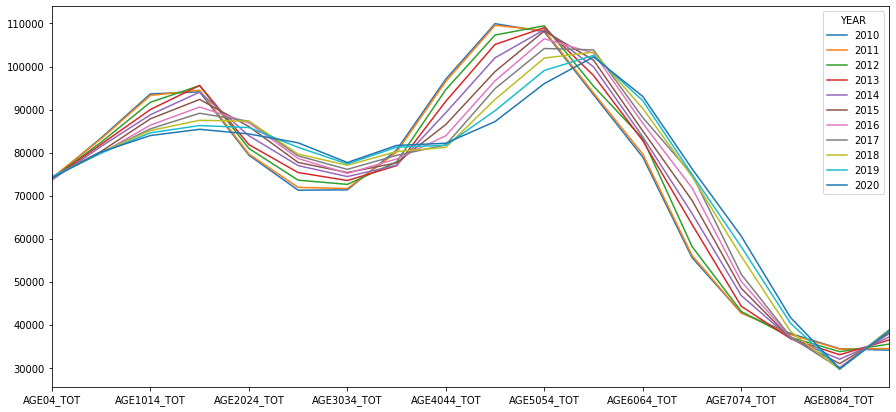

In [22]:
nassau_total.T.plot(figsize=(15, 7));

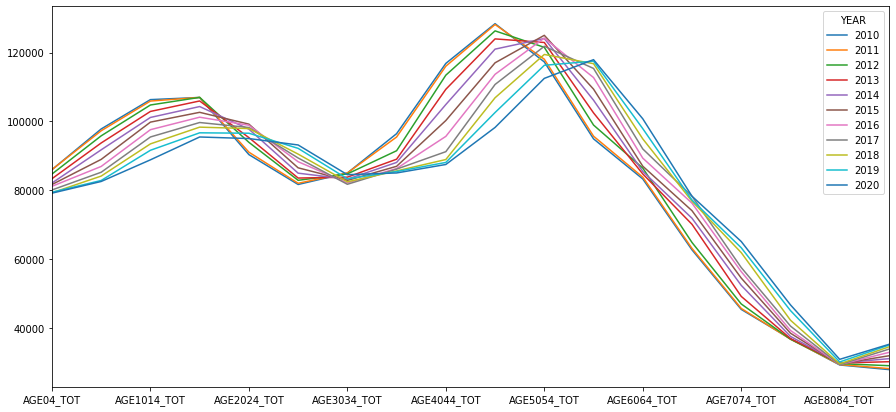

In [24]:
suffolk_total.T.plot(figsize=(15, 7));

In [18]:
nassau_male.to_csv('nassau_male.csv')

In [33]:
# long island total
long_island_total = long_island.groupby('YEAR').sum()
long_island_total = long_island_total[['AGE04_TOT', 'AGE59_TOT',
                         'AGE1014_TOT', 'AGE1519_TOT', 'AGE2024_TOT',
                         'AGE2529_TOT', 'AGE3034_TOT', 'AGE3539_TOT', 
                         'AGE4044_TOT', 'AGE4549_TOT', 'AGE5054_TOT',
                         'AGE5559_TOT', 'AGE6064_TOT', 'AGE6569_TOT',
                         'AGE7074_TOT', 'AGE7579_TOT', 'AGE8084_TOT',
                         'AGE85PLUS_TOT']]
long_island_total

,AGE04_TOT,AGE59_TOT,AGE1014_TOT,AGE1519_TOT,AGE2024_TOT,AGE2529_TOT,AGE3034_TOT,AGE3539_TOT,AGE4044_TOT,AGE4549_TOT,AGE5054_TOT,AGE5559_TOT,AGE6064_TOT,AGE6569_TOT,AGE7074_TOT,AGE7579_TOT,AGE8084_TOT,AGE85PLUS_TOT
YEAR,,,,,,,,,,,,,,,,,,
2010,159867,181225,199981,201072,169752,152919,156330,177041,213952,238389,225389,188363,162214,118242,88063,74738,63562,61897
2011,160123,180496,199205,201485,170717,153920,156651,175561,212611,237752,226466,189552,163442,119156,88346,74356,63612,62557
2012,158688,178223,196475,202556,174875,156461,157341,169293,208089,233650,231016,194365,169692,122956,89987,73735,63280,64433
2013,157229,175662,192911,201539,177147,158889,157291,165968,201266,229137,231991,200399,167496,133392,93401,73602,62737,66541
2014,155713,173173,189942,198372,181670,161926,157632,165127,194186,223055,232667,206094,169122,137681,99096,74287,61682,68114
2015,156006,169239,187640,194999,185267,164209,158202,164548,186787,215876,233305,210866,172011,142940,102889,75252,60458,69736
2016,155573,166769,183970,191802,185799,166902,157269,164820,179557,210388,230703,215882,176122,148014,106342,76261,59388,71246
2017,154239,165170,180990,188817,185494,168599,157811,165469,173001,205619,226041,219268,180141,153163,109204,77699,59078,72555
2018,153479,164144,178596,185837,185224,170147,159483,165837,170130,199231,221433,220148,185171,151205,117746,80635,59048,73157


In [34]:
long_island_total.to_csv('long_island_total.csv')